# Exploration of Deutsch’s Algorithm
***

## **Introduction**
### The Rise of Quantum Algorithms
In the rapidly evolving world of computer science, quantum algorithms have emerged as a groundbreaking frontier. These algorithms, unlike their classical counterparts, leverage the unique properties of quantum mechanics to solve certain problems more efficiently. Quantum computing holds the potential to revolutionize various sectors, from cryptography to material science, by tackling problems that are currently beyond the reach of classical computers.

### What is Deutsch’s Algorithm?
Deutsch’s Algorithm stands as one of the pioneering quantum algorithms, showcasing the power and promise of quantum computation. Proposed by David Deutsch in 1985, it was the first algorithm to demonstrate a clear quantum speedup over classical computation, albeit for a simple problem.

### The Problem Proposition
At its core, Deutsch’s Algorithm addresses a simple question about a binary function: Is the function balanced (i.e., produces both 0 and 1 outputs) or constant (always outputs 0 or always outputs 1)? While this may seem trivial at first glance, the quantum solution offers a peek into the immense power of quantum parallelism. Whereas a classical computer might need to evaluate the function multiple times to determine its nature, a quantum computer can deduce the answer in a single query—exemplifying the speedup quantum algorithms can achieve.

### Objective of this Project
Through this project, we aim to delve deep into the intricacies of Deutsch’s Algorithm. We'll embark on a journey starting with the algorithm's theoretical underpinnings, explore its practical implementation using the Qiskit framework, and verify its efficiency through simulation. By the end, the goal is to have a comprehensive understanding of the algorithm's significance, its workings, and its place in the broader landscape of quantum computing.

***
## **Mathematical Foundations**
### Quantum Bits (Qubits)
In classical computing, information is stored and processed in bits, which can take on values of either 0 or 1. Quantum computing, however, introduces a new computational unit: the **qubit**. Unlike classical bits, qubits can exist not just in a state corresponding to 0 or 1, but also in a superposition of these states. This means a qubit can represent both 0 and 1 simultaneously, a property that allows quantum computers to process a high number of possibilities concurrently.

Mathematically, a qubit's state can be represented as: $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle $ <br>
where $ |\alpha|^2 $  is the probability of the qubit being in state $|0\rangle$ and $ |\beta|^2 $  is the probability of the qubit being in state $|1\rangle$. The values of $\alpha$ and $\beta$  are complex numbers, and they must satisfy the normalization condition: $ |\alpha|^2 + |\beta|^2 = 1 $. It's only upon measurement that a qubit "chooses" one of its base states, based on the probabilities defined by

### Quantum Superposition
As touched upon earlier, **superposition** is the unique ability of qubits to exist in multiple states simultaneously. This doesn't mean the qubit is in a state of flux or indecision. Instead, it's in a precise state that's a combination of $|0\rangle$ and $|1\rangle$. It's only upon measurement that a qubit "chooses" one of its base states, based on the probabilities defined by $ |\alpha|^2 $ and $ |\beta|^2 $.

### Quantum Entanglement
Another quintessential quantum phenomenon is **entanglement**, a unique kind of correlation that can exist between qubits. When qubits become entangled, the state of one qubit immediately influences the state of the other, no matter the distance between them. This property has profound implications for quantum algorithms, allowing them to achieve feats classically thought impossible.

A simple example of entangled qubits can be represented by the Bell state: <br>
$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ <br>
In this entangled state, if one qubit is measured to be in state $|0\rangle$, the other qubit will also be found in state 
$|0\rangle$, and vice versa.

### Quantum Gates and Operations
Just as classical bits are manipulated using logical gates (AND, OR, NOT, etc.), qubits are manipulated using **quantum gates**. These gates perform linear unitary operations on qubits, transforming their states while preserving their normalization. Some basic quantum gates include the Pauli-X, Pauli-Y, Pauli-Z, and Hadamard gates. The Hadamard gate, in particular, plays a crucial role in Deutsch’s Algorithm by creating superposition states.

For instance, a Hadamard gate applied to a qubit in state $|0\rangle$ results in:<br>
$ H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $ <br>
This operation generates a qubit in a superposition state.

*** 
## **Deutsch’s Algorithm**

Deutsch's Algorithm occupies a pivotal position in the panorama of quantum computing. As one of the earliest quantum algorithms, it stands as both a testament to the potential of quantum computing and as a foundation upon which many subsequent quantum algorithms were built.

Historically, the introduction of Deutsch's Algorithm marked a paradigm shift. Formulated by the British physicist David Deutsch in 1985, this algorithm provided one of the first clear examples of how quantum computers could outperform classical computers under specific circumstances. While the problem it addresses—a determination of whether a given black-box function is balanced or constant—might seem deceptively simple, the quantum solution's elegance and efficiency were revelatory.

This quantum solution's inherent efficiency was not merely a slight improvement; it presented a scenario wherein a quantum computer could determine the nature of the function with just a single query, whereas a classical computer might require multiple queries. This quantum speedup, although demonstrated on a simplified problem, hinted at the broader potential of quantum computing.

Furthermore, the algorithm's mechanics introduced concepts fundamental to quantum computing, such as the use of quantum interference and the leveraging of qubits' ability to exist in a superposition of states.

The significance of Deutsch’s Algorithm transcends its specific utility. It served as a trailblazer, highlighting the realms of possibility awaiting exploration within quantum computing. The algorithm's introduction spurred further research, leading to more complex and versatile quantum algorithms. It became a cornerstone, a reference point, and an educational tool, driving enthusiasm and curiosity in both the academic and industrial sectors of the burgeoning field of quantum computing.

### Historical Context and Importance of Deutsch’s Algorithm

Deutsch’s Algorithm was introduced by British physicist David Deutsch in 1985. David Deutsch is often regarded as one of the founding figures of quantum computing, and his early work in the field laid down critical foundational principles that many later developments would build upon.

The introduction of this algorithm in the mid-1980s marked a watershed moment in computational theory. At its core, the algorithm was designed to determine if a given black-box function is constant or balanced. While this might seem like a relatively simple problem, what made Deutsch's approach revolutionary was his demonstration of a quantum solution's potential superiority over classical methods. Specifically, a quantum computer leveraging Deutsch's Algorithm could ascertain the nature of the function with just a single query, whereas a classical computer would require multiple queries to achieve the same result with certainty.

Deutsch’s Algorithm is recognized as one of the first quantum algorithms. This distinction is not merely chronological; the algorithm symbolizes the dawn of a new computational era. It provided one of the earliest instances of "quantum advantage," a term used to describe scenarios where quantum computers can outperform classical computers.

The significance of demonstrating this quantum advantage, even on such a specific and simplified problem, cannot be understated. It was a concrete example showing that quantum computers had the potential to process information in fundamentally new ways, offering efficiencies previously thought unreachable with classical computing paradigms.

In essence, while Deutsch’s Algorithm might address a niche problem, its broader implications reverberated through the scientific community. It served as a beacon, illustrating the promise of quantum computing and paving the way for subsequent research and developments in the field. It wasn't just about solving a specific problem more efficiently; it was a demonstration of a whole new computational frontier on the horizon.

###  Problem Statement

**Binary Functions:**

Binary functions, as the name suggests, deal with two discrete outputs. In the context of Deutsch’s Algorithm, we're specifically interested in functions that take a single binary input (0 or 1) and produce a binary output (0 or 1).

**Constant Functions:**

A function is termed "constant" if its output remains unchanged regardless of the input value. This means that for a binary function, it will always return either 0 or 1, irrespective of whether the input is 0 or 1.

*Examples:*

1. $ f(x) = 0 \quad \text{for all } x $
2. $ f(x) = 1 \quad \text{for all } x $


In both examples, it's clear that the output is independent of the input, hence they are constant functions.

**Balanced Functions:**

Conversely, a function is "balanced" if half of the possible inputs yield 0 and the other half yield 1. For binary functions dealing with single-bit inputs, this means the function returns 0 for one input and 1 for the other.

*Examples:*

1. $ f(0) = 0 $ and $ f(1) = 1 $
2. $ f(0) = 1 $ and $ f(1) = 0 $


In these examples, the function's output toggles based on the input, making them balanced functions.

**Classical Challenge:**

The central problem, which Deutsch’s Algorithm addresses, revolves around determining the nature of a given binary function (encased within a 'black-box' or oracle) – is it constant or balanced?

From a classical perspective, this task seems straightforward but isn't efficient. The reason is the uncertainty surrounding the black-box function's behavior. A classical computer would first query the oracle with one input (say 0) and note the output. If the output is 0, the function could still be either constant (with all outputs being 0) or balanced (with the output for input 1 being 1). To conclusively determine the nature of the function, the classical computer would then have to make a second query with the other input (1 in this case). Thus, it requires two queries to guarantee certainty.

In essence, while it might seem trivial, the classical approach doesn't provide an efficient solution, requiring multiple queries to solve the problem with certainty. Deutsch's Algorithm, on the other hand, presents a quantum solution that achieves the same with just one query, showcasing the power and potential of quantum algorithms.






### Introducing Deutsch’s Algorithm

**Unique Proposition:**

Deutsch’s Algorithm stands as a paradigm-shifting proposition in the landscape of quantum computing. What makes it so exceptional is its ability to ascertain the nature of a given black-box binary function with just a singular query. To put this in perspective, where classical computers would necessitate two queries to determine if the function is balanced or constant, Deutsch’s Algorithm, through the power of quantum mechanics, slashes this requirement by half.

This efficiency is more than a mere computational speedup. It embodies the spirit of quantum advantage, illustrating a task where quantum algorithms don't just perform better than classical counterparts but do so in a fundamentally distinct manner.

**Quantum Mechanics at Play:**

The magic behind Deutsch’s Algorithm largely stems from the foundational principles of quantum mechanics: superposition and interference.

1. **Superposition:** At the heart of the algorithm is the ability of qubits to exist in a superposition of states. When a qubit is in a superposition, it isn't just in one of its base states (0 or 1) but a probabilistic combination of both. This allows the quantum computer to process multiple possibilities simultaneously, setting the stage for the algorithm's unique querying capability.

2. **Interference:** Once the qubits are in superposition, the quantum gates manipulate these states such that they interfere with each other in a constructive or destructive manner. This interference pattern is the key to Deutsch's Algorithm. By cleverly designing the quantum circuit, the algorithm ensures that certain outcomes interfere destructively, canceling out and leaving behind only the information necessary to determine if the black-box function is balanced or constant.

By harnessing these quantum phenomena, Deutsch’s Algorithm can glean information about the function encapsulated within the oracle without overtly revealing its precise nature. It's a delicate dance of quantum states, resulting in an output that, when measured, instantly reveals the nature of the function with impeccable efficiency.

###  Step-by-Step Mechanics of the Algorithm

1. **Initialization:**

**Two Quibit System**The algorithm starts with two qubits. The first qubit, often referred to as the 'control qubit, is initialized to the state $|0\rangle$.The second qubit, known as the 'target qubit, is initialized to the state $|1\rangle$.This setup creates a baseline for the quantum operations that follow.

**Initial State Representation**  Mathematically, the combined initial state of this two-qubit system can be represented as: $$ |\psi_0\rangle = |0\rangle \otimes |1\rangle $$

2. **Application of Gates:**

**Hadamard Gates on Both Qubits:** To generate a superposition of states, Hadamard gates are applied to both qubits. The Hadamard gate,  takes a qubit from a definite state and places it into a state that is equally likely to collapse to either $|0\rangle$ or $|1\rangle$ upon measuremeant.

**Creating Superposition:** The application of the Hadamard gate transforms our qubits into a superposition of all four possible binary states. The resultant state of the system is a linear combination of $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$ This state can be represented as: $$ |\psi_1\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) $$ This results in a superposition of all possible combinations of the two qubits.


3. **Oracle Interaction:**

The oracle, or the 'black box', is a crucial component of the algorithm. It embodies the unknown binary function, either constant or balanced, that we aim to identify. The algorithm interacts with this oracle using the quantum principle of phase kickback.

When the two-qubit system (in superposition) is passed through the oracle, the oracle imparts a specific phase shift to the states based on the nature of the binary function. Without revealing the exact function, the oracle's interaction has the effect of marking the function's nature within the phase of the quantum states. The resulting state after this interaction can be represented as: $$ |\psi_2\rangle $$
It's crucial to note that the specific form of $ |\psi_2\rangle  $ will be contingent on the nature of the binary function within the oracle.

4. **Final Measurement:**

After the oracle interaction, another round of Hadamard gates is applied to transform the state of the qubits. The interference patterns that arise from this transformation process effectively translate the phase information (from the oracle interaction) into a measurable value.

When we measure the first qubit, the outcome reveals the nature of the binary function:

If the measurement results in $|0\rangle$, it indicates that the function is constant.
If the measurement results in $|1\rangle$, it signifies that the function is balanced.
Thus, with just one quantum query and subsequent measurement, the algorithm achieves what a classical approach would need two queries to confirm, demonstrating the efficiency and power of quantum computing.

### Key Takeaways and Efficiency

**Quantum Advantage:**

Deutsch's Algorithm exhibits a marked advantage over classical algorithms, primarily in the realm of query efficiency. In classical computing, determining whether a given black-box function (or oracle) is balanced or constant necessitates querying the oracle multiple times. Specifically, in a worst-case scenario, a classical algorithm might require two queries to ascertain the nature of the function.

In stark contrast, Deutsch's Algorithm, leveraging the principles of quantum mechanics, achieves the same goal with just a single query. This distinction may seem minimal given that we're only discussing one versus two queries. However, this reduction in queries illustrates a quantum advantage, setting the stage for more complex algorithms where quantum computing can offer exponentially fewer queries or steps than classical methods.

**Implications:**

The efficiency of Deutsch's Algorithm is not just about the reduced number of queries, but it's symbolic of a deeper underlying potential. This algorithm was one of the first to demonstrate that quantum computers could, in certain scenarios, outperform classical computers. While the real-world applications of Deutsch's Algorithm might be limited, its significance lies in its role as a harbinger of the promise of quantum computing.

The broader implication of this efficiency gain is profound. As quantum algorithms and technologies continue to develop, the domains in which quantum computers can surpass classical computers are expected to grow. Algorithms like Deutsch’s serve as foundational milestones, emphasizing the promise and potential quantum computing holds for tackling problems deemed computationally infeasible for classical machines.

The quantum advantage exhibited by Deutsch's Algorithm is a testament to the potential shift in computational paradigms, paving the way for more intricate quantum algorithms like Grover's and Shor's, which further the boundary of quantum computational supremacy.

### Implementation of Deutsch’s Algorithm Using Qiskit:



**Import Qiskit**

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit import __qiskit_version__
print("Qiskit Aer version:", __qiskit_version__['qiskit-aer'])

Qiskit Aer version: 0.13.1


C:\Users\daral\AppData\Local\Temp\ipykernel_16292\1036999180.py:4: DeprecationWarning: qiskit.__qiskit_version__ is deprecated since Qiskit Terra 0.25.0, and will be removed 3 months or more later. Instead, you should use qiskit.__version__. The other packages listed in theformer qiskit.__qiskit_version__ have their own __version__ module level dunder, as standard in PEP 8.
  print("Qiskit Aer version:", __qiskit_version__['qiskit-aer'])


**Building the Quantum Circuit:**
 1. Initialize the Quantum Circuit:
 
Create a quantum circuit with 2 qubits and 1 classical bit:

In [2]:
qc = QuantumCircuit(2, 1)

2. Apply Initial Hadamard Gates:

Apply a Hadamard gate to the first qubit and prepare the second qubit in the $|1\rangle$ state:

In [3]:
qc.h(0)   # Hadamard gate on the first qubit
qc.x(1)   # Pauli-X gate to flip the second qubit to |1>
qc.h(1)   # Hadamard gate on the second qubit

**Designing the Oracle:**
1.Constant Oracle:

For a constant oracle, you can choose to do nothing (identity operation) or apply a global phase. For simplicity, we'll opt for the identity operation:

In [4]:
# Identity operation (doing nothing)
# qc.id(0)

2. Balanced Oracle:

For a balanced oracle, you can use a CNOT gate. The first qubit is the control, and the second is the target:

In [5]:
qc.cx(0, 1)  # CNOT gate with the first qubit as control and the second as target

**Completing the Circuit:**
1. Final Hadamard Gate and Measurement:

Apply another Hadamard gate to the first qubit and measure it:

In [6]:
qc.h(0)
qc.measure(0, 0)  # Measure the first qubit and store the result in the first classical bit

2. Visualize the Circuit:

(Optional) Display the circuit to verify its structure:

In [7]:
print(qc.draw())

     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


**Running the Circuit:**

1. Use Aer Simulator:

Set up the Aer simulator to run your quantum circuit:

In [8]:
simulator = Aer.get_backend('aer_simulator')

2. Execute the Circuit:

Run the circuit on the simulator:

In [9]:
job = execute(qc, simulator, shots=1024)
result = job.result()

3. View the Results:

Plot a histogram of the results to see the measurement outcomes:

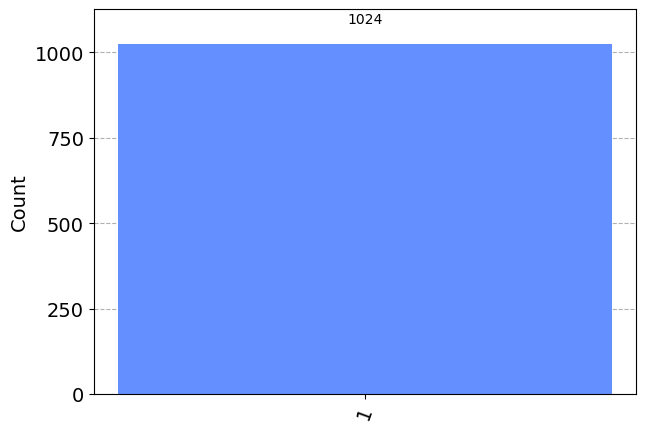

In [10]:
counts = result.get_counts(qc)
plot_histogram(counts)

###

**Interpreting the Results:**

If the measured result is predominantly $|0\rangle$, the function is constant.

If the result is predominantly $|1\rangle$, the function is balanced.